# Import Library

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataframe

In [65]:
df = pd.read_csv('boston.csv')

In [66]:
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7
159,1.42502,0.0,19.58,0,0.871,6.510,100.0,1.7659,5,403,14.7,364.31,7.39,23.3
24,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6
363,4.22239,0.0,18.10,1,0.770,5.803,89.0,1.9047,24,666,20.2,353.04,14.64,16.8
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26,43.1


## Split Data

In [67]:
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

#split data train + test
(x_train, x_test,
 y_train, y_test) = train_test_split(feature,
                                     target,
                                     test_size=0.20,
                                     random_state=42)

#split data train + validation
(x_train, x_validation,
 y_train, y_validation) = train_test_split(feature,
                                     target,
                                     test_size=0.20,
                                     random_state=42)                                     

# Multicolinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(x_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


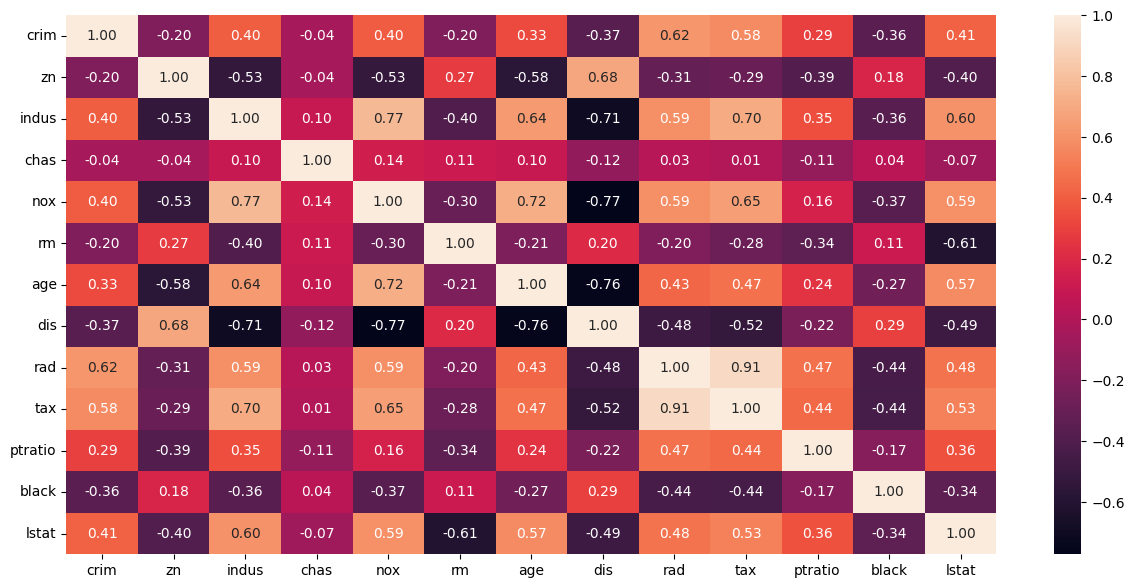

In [69]:
data_train = pd.concat([x_train, x_train])
corr = data_train.corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [70]:
x_train = x_train.drop(columns=['tax','rad'])
x_validation = x_validation.drop(columns=['tax','rad'])
x_test = x_test.drop(columns=['tax','rad'])

In [71]:
X = add_constant(x_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.411910
2,zn,2.233054
3,indus,3.229591
4,chas,1.083338
5,nox,3.988711
6,rm,1.866058
7,age,2.951810
8,dis,4.159840
9,ptratio,1.492126
10,black,1.288546


# Model Trainning

## Ridge Regression

In [72]:
from sklearn.linear_model import Ridge

xx_train = x_train.to_numpy()
yy_train = y_train.to_numpy()
yy_train = yy_train.reshape(len(y_train),)

ridge_reg_001 = Ridge(alpha=0.01, random_state=42)
ridge_reg_01 = Ridge(alpha=0.1, random_state=42)
ridge_reg_1 = Ridge(alpha=1.0, random_state=42)
ridge_reg_10 = Ridge(alpha=10, random_state=42)

ridge_reg_001.fit(xx_train, yy_train)
ridge_reg_01.fit(xx_train, yy_train)
ridge_reg_1.fit(xx_train, yy_train)
ridge_reg_10.fit(xx_train, yy_train)

Ridge(alpha=10, random_state=42)

In [73]:
from sklearn.metrics import mean_squared_error

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_001,
          ridge_reg_01,
          ridge_reg_1,
          ridge_reg_10]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(x_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}');

RMSE of Ridge regression model with alpha = 0.01 is 5.147398457363686
RMSE of Ridge regression model with alpha = 0.1 is 5.145084821309356
RMSE of Ridge regression model with alpha = 1.0 is 5.140968287138583
RMSE of Ridge regression model with alpha = 10 is 5.134733196347523


c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Jika menggunakan model ridge, alpha dengan nilai 10 memiliki RMSE paling kecil yang mana merupakan yang terbaik

In [74]:
ridge_best = ridge_reg_10

coef_df = pd.DataFrame({
    'feature':['intercept'] + x_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,18.080114
1,crim,-0.084650
2,zn,0.025122
3,indus,-0.089924
4,chas,2.072943
5,nox,-1.803222
6,rm,4.416635
7,age,-0.016906
8,dis,-1.220493
9,ptratio,-0.712329


Setiap 1 poin peningkatan pada fitur Criminal Rate (Crim) maka akan mempengaruhi pengurangan pada harga rumah (medv) sebesar 0.0582

## Lasso Regression

In [75]:
from sklearn.linear_model import Lasso

lass_001 = Lasso(alpha=0.01, random_state=42)
lass_01 = Lasso(alpha=0.1, random_state=42)
lass_1 = Lasso(alpha=1.0, random_state=42)
lass_10 = Lasso(alpha=10, random_state=42)

lass_001.fit(xx_train, yy_train)
lass_01.fit(xx_train, yy_train)
lass_1.fit(xx_train, yy_train)
lass_10.fit(xx_train, yy_train)

Lasso(alpha=10, random_state=42)

In [76]:
modelss = [lass_001,
          lass_01,
          lass_1,
          lass_10]

for model, alpha in zip(modelss, alphas):
    y_predict_validation = model.predict(x_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}');

RMSE of Ridge regression model with alpha = 0.01 is 5.140061900228605
RMSE of Ridge regression model with alpha = 0.1 is 5.18266104043835
RMSE of Ridge regression model with alpha = 1.0 is 5.165596306424116
RMSE of Ridge regression model with alpha = 10 is 5.915760966433104


c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
c:\Users\M. Wahid Mudzakir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Jika menggunakan model lasso, alpha dengan nilai 1 memiliki RMSE paling kecil yang mana merupakan yang terbaik

In [77]:
lass_best = lass_1

coef_df = pd.DataFrame({
    'feature':['intercept'] + x_train.columns.tolist(),
    'coefficient':[lass_best.intercept_] + list(lass_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,30.703778
1,crim,-0.062347
2,zn,0.017547
3,indus,-0.047317
4,chas,0.000000
5,nox,-0.000000
6,rm,1.862130
7,age,0.014692
8,dis,-0.583945
9,ptratio,-0.690550


Setiap 1 poin peningkatan pada fitur Criminal Rate (Crim) maka akan mempengaruhi pengurangan pada harga rumah (medv) sebesar 0.0489

# Test Model

## Ridge

### Train Error

In [78]:
y_predict_train = ridge_best.predict(xx_train)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.795724192802886
MAE for training data is 3.344208575221865
MAPE for training data is 0.16613408665252


### Testing Error

In [80]:
X_admit_test = x_test.to_numpy()
y_predict_test = ridge_best.predict(X_admit_test)

y_admit_test = y_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_admit_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test)))
print(f'MAPE for testing data is {round((mean_absolute_percentage_error(y_admit_test, y_predict_test))*100,2)}%')

RMSE for testing data is 5.134733196347523
MAE for testing data is 3.2599489066070975
MAPE for testing data is 17.56%


## Lasso

### Train Error

In [82]:
y_predict_train = lass_best.predict(xx_train)

In [83]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 5.203589237657891
MAE for training data is 3.690610427526449
MAPE for training data is 0.17480855171490858


### Testing Error

In [84]:
X_admit_test = x_test.to_numpy()
y_predict_test = lass_best.predict(X_admit_test)

y_admit_test = y_test.to_numpy()
y_admit_test = y_admit_test.reshape(len(y_admit_test),)

In [85]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_admit_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_admit_test, y_predict_test)))
print(f'MAPE for testing data is {round((mean_absolute_percentage_error(y_admit_test, y_predict_test))*100,2)}%')

RMSE for testing data is 5.165596306424116
MAE for testing data is 3.4821115954567303
MAPE for testing data is 18.15%
